# Linear Algebra: Systems of Linear Equations

This notebook generates visualizations for the blog post on systems of linear equations.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

## Visualize System of Two Equations

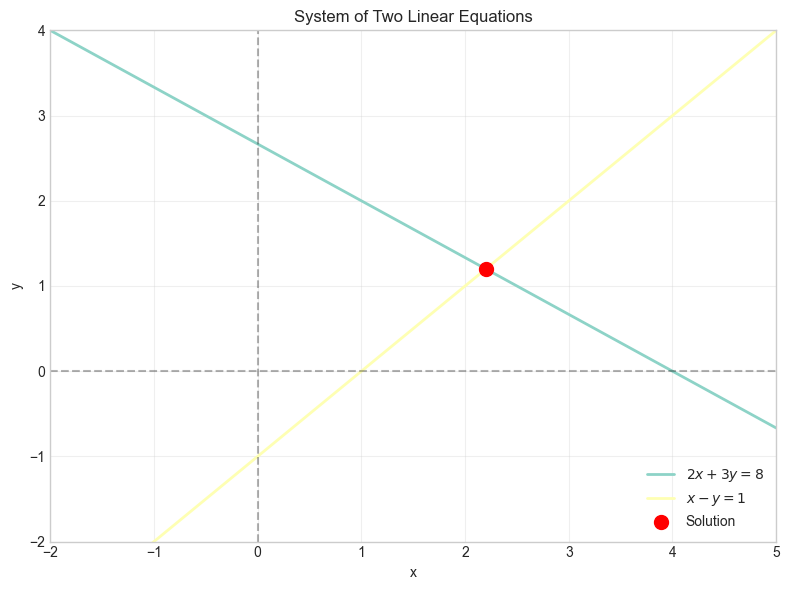

In [14]:
# Visualize the system of equations
x = np.linspace(-2, 5, 100)

# 2x + 3y = 8  =>  y = (8 - 2x) / 3
y1 = (8 - 2*x) / 3

# x - y = 1  =>  y = x - 1
y2 = x - 1

plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='$2x + 3y = 8$', linewidth=2)
plt.plot(x, y2, label='$x - y = 1$', linewidth=2)
plt.scatter([2.2], [1.2], color='red', s=100, zorder=5, label='Solution')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('System of Two Linear Equations')
plt.axis((-2, 5, -2, 4))
plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/system-two-equations.png', dpi=150, bbox_inches='tight')
plt.show()

## Matrix Representation

In [15]:
# Define the coefficient matrix A and constant vector b
A = np.array([[2, 3],
              [1, -1]])

b = np.array([8, 1])

print(f"Coefficient matrix A:\n{A}\n")
print(f"Constant vector b:\n{b}")

Coefficient matrix A:
[[ 2  3]
 [ 1 -1]]

Constant vector b:
[8 1]


## Solving with NumPy

In [16]:
# Solve the system Ax = b
x = np.linalg.solve(A, b)
print(f"Solution: x = {x[0]:.4f}, y = {x[1]:.4f}")

Solution: x = 2.2000, y = 1.2000


In [17]:
# Verify the solution
result = A @ x
print(f"A @ x = {result}")
print(f"b     = {b}")
print(f"Match: {np.allclose(result, b)}")

A @ x = [8. 1.]
b     = [8 1]
Match: True


## Gaussian Elimination Example

In [18]:
# Define the system
A_large = np.array([[1, 2, 1],
                    [2, -1, 3],
                    [3, 1, -1]], dtype=float)

b_large = np.array([9, 8, 3], dtype=float)

# Create augmented matrix
aug = np.column_stack((A_large, b_large))
print(f"Initial augmented matrix:\n{aug}\n")

Initial augmented matrix:
[[ 1.  2.  1.  9.]
 [ 2. -1.  3.  8.]
 [ 3.  1. -1.  3.]]



In [19]:
# Step 1: Eliminate x from row 2 (R2 = R2 - 2*R1)
aug[1] = aug[1] - 2 * aug[0]
print(f"After R2 = R2 - 2*R1:\n{aug}\n")

# Step 2: Eliminate x from row 3 (R3 = R3 - 3*R1)
aug[2] = aug[2] - 3 * aug[0]
print(f"After R3 = R3 - 3*R1:\n{aug}\n")

# Step 3: Make pivot in row 2 equal to 1 (R2 = R2 / -5)
aug[1] = aug[1] / -5
print(f"After R2 = R2 / -5:\n{aug}\n")

# Step 4: Eliminate y from row 3 (R3 = R3 + 5*R2)
aug[2] = aug[2] + 5 * aug[1]
print(f"After R3 = R3 + 5*R2:\n{aug}\n")

# Step 5: Make pivot in row 3 equal to 1 (R3 = R3 / -6)
aug[2] = aug[2] / -6
print(f"After R3 = R3 / -6:\n{aug}")

After R2 = R2 - 2*R1:
[[  1.   2.   1.   9.]
 [  0.  -5.   1. -10.]
 [  3.   1.  -1.   3.]]

After R3 = R3 - 3*R1:
[[  1.   2.   1.   9.]
 [  0.  -5.   1. -10.]
 [  0.  -5.  -4. -24.]]

After R2 = R2 / -5:
[[  1.    2.    1.    9. ]
 [ -0.    1.   -0.2   2. ]
 [  0.   -5.   -4.  -24. ]]

After R3 = R3 + 5*R2:
[[  1.    2.    1.    9. ]
 [ -0.    1.   -0.2   2. ]
 [  0.    0.   -5.  -14. ]]

After R3 = R3 / -6:
[[ 1.          2.          1.          9.        ]
 [-0.          1.         -0.2         2.        ]
 [-0.         -0.          0.83333333  2.33333333]]


In [20]:
# Back substitution
z = aug[2, 3]
y = aug[1, 3] - aug[1, 2] * z
x = aug[0, 3] - aug[0, 1] * y - aug[0, 2] * z

print(f"Solution: x = {x:.4f}, y = {y:.4f}, z = {z:.4f}")

Solution: x = 1.7333, y = 2.4667, z = 2.3333


## Visualizing Solution Types

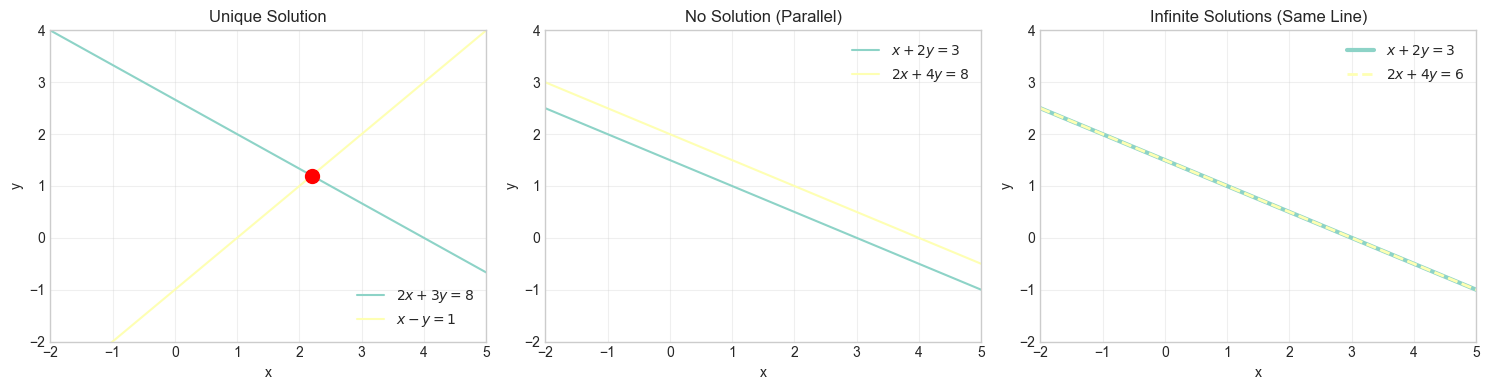

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
x = np.linspace(-2, 5, 100)

# Plot 1: Unique solution
ax1 = axes[0]
ax1.plot(x, (8 - 2*x)/3, label='$2x + 3y = 8$')
ax1.plot(x, x - 1, label='$x - y = 1$')
ax1.scatter([2.2], [1.2], color='red', s=100, zorder=5)
ax1.set_title('Unique Solution')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-2, 5)
ax1.set_ylim(-2, 4)

# Plot 2: No solution (parallel lines)
ax2 = axes[1]
ax2.plot(x, (3 - x)/2, label='$x + 2y = 3$')
ax2.plot(x, (8 - 2*x)/4, label='$2x + 4y = 8$')
ax2.set_title('No Solution (Parallel)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-2, 5)
ax2.set_ylim(-2, 4)

# Plot 3: Infinite solutions (same line)
ax3 = axes[2]
ax3.plot(x, (3 - x)/2, label='$x + 2y = 3$', linewidth=3)
ax3.plot(x, (6 - 2*x)/4, label='$2x + 4y = 6$', linestyle='--', linewidth=2)
ax3.set_title('Infinite Solutions (Same Line)')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xlim(-2, 5)
ax3.set_ylim(-2, 4)

plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/solution-types.png', dpi=150, bbox_inches='tight')
plt.show()

## Network Flow Example

In [22]:
# Network flow example: Water distribution
# Node balance equations (flow in = flow out)
#
#       x1          x2
#   [1]---->[2]---->[4]
#    |       |       |
#    |x4     |x3     |x5
#    v       v       v
#   [3]---->[5]---->[6]
#       x6      x7
#
# Given: Total inflow at [1] = 100, outflow at [4] = 40, outflow at [6] = 60

A_flow = np.array([
    [1, 0, 0, 1, 0, 0, 0],    # Node 1: x1 + x4 = 100
    [1, -1, -1, 0, 0, 0, 0],   # Node 2: x1 = x2 + x3
    [0, 0, 0, 1, 0, -1, 0],    # Node 3: x4 = x6
    [0, 1, 0, 0, 1, 0, 0],     # Node 4: x2 + x5 = 40
    [0, 0, 1, 0, 0, 1, -1],    # Node 5: x3 + x6 = x7
    [0, 0, 0, 0, 1, 0, 1],     # Node 6: x5 + x7 = 60
    [0, 0, 1, 0, -1, 0, 0]     # Additional constraint: x3 = x5
])

b_flow = np.array([100, 0, 0, 40, 0, 60, 0])

# Solve
flow_solution = np.linalg.solve(A_flow, b_flow)
print("Network flow solution:")
for i, val in enumerate(flow_solution, 1):
    print(f"  x{i} = {val:.2f}")

Network flow solution:
  x1 = 40.00
  x2 = 40.00
  x3 = -0.00
  x4 = 60.00
  x5 = 0.00
  x6 = 60.00
  x7 = 60.00


## Least Squares for Overdetermined Systems

In [23]:
# Overdetermined system: fit a line to 5 points
# y = mx + c
points = np.array([[1, 2.1], [2, 3.9], [3, 6.2], [4, 7.8], [5, 10.1]])

# Set up Ax = b where A = [[x, 1], ...] and b = [y, ...]
A_ls = np.column_stack((points[:, 0], np.ones(len(points))))
b_ls = points[:, 1]

print(f"Coefficient matrix A (overdetermined):\n{A_ls}\n")
print(f"Constant vector b:\n{b_ls}\n")

# Solve using least squares
solution_ls, residuals, rank, s = np.linalg.lstsq(A_ls, b_ls, rcond=None)
print(f"Least squares solution: m = {solution_ls[0]:.4f}, c = {solution_ls[1]:.4f}")

Coefficient matrix A (overdetermined):
[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]]

Constant vector b:
[ 2.1  3.9  6.2  7.8 10.1]

Least squares solution: m = 1.9900, c = 0.0500


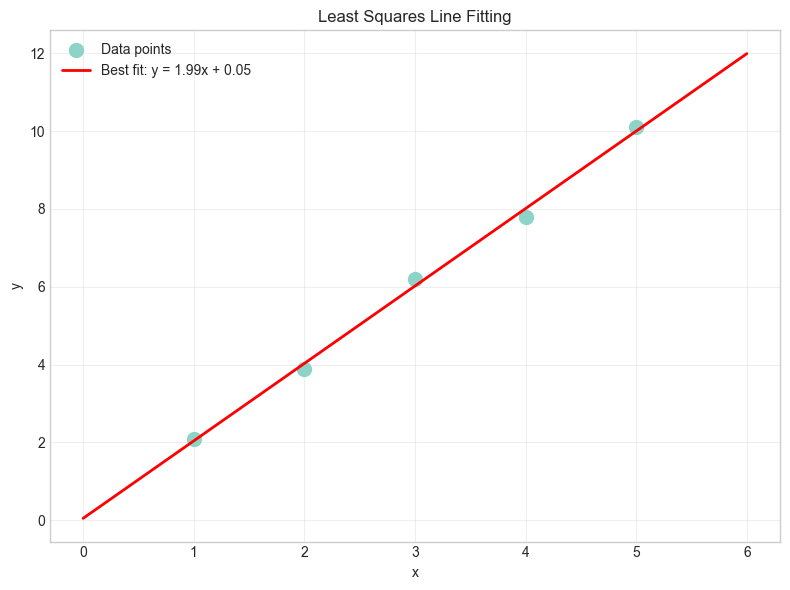

In [24]:
# Visualize the least squares fit
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], s=100, label='Data points')
x_line = np.linspace(0, 6, 100)
y_line = solution_ls[0] * x_line + solution_ls[1]
plt.plot(x_line, y_line, 'r-', linewidth=2,
         label=f'Best fit: y = {solution_ls[0]:.2f}x + {solution_ls[1]:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Least Squares Line Fitting')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/least-squares-fit.png', dpi=150, bbox_inches='tight')
plt.show()